## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1: Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [46]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [47]:
print("Количество пропусков в данных:", (X.isnull().sum().sum()))  # нет пропусков
print("Количество пропусков в целевой переменной:", (np.isnan(y).sum()))  # нет пропусков

# Категориальных признаков нет (видно из данных выше). Все чиселки.
# Но всё равно проверю это кодом, ведь в будущем будет явно больше параметров
display(X.select_dtypes(exclude='number'))  # можно увидеть что нет категориальных значений

Количество пропусков в данных: 0
Количество пропусков в целевой переменной: 0


""
0
1
2
3
4
...
173
174
175
176


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [48]:
from sklearn.model_selection import train_test_split

np.random.seed(123)

# Аргумент stratify позволяет разбивать данные в той же пропорции для целевой переменной, в какой они были в целых данных
# В данном случае это важно, потому что не возникнет различий в соотношении классов в обучающей и тестовой выборке
# что в свою очередь позволяет сбалансировано оценивать производительность модели с сохранением лучше обобщающей способностью, особенно если есть явный дисбаланс классов (одного класса сильно больше чем другого) 
# (взял информацию отсюда https://stackoverflow.com/a/38889389)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print("Первые 5 значений каждого объекта")
display(X_train.head(5))
display(X_test.head(5))
display(y_train[:5])
display(y_test[:5])


Первые 5 значений каждого объекта


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
29,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.1,0.96,3.36,845.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.5,1.25,3.40,915.0
58,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.8,0.89,2.87,1285.0
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.8,0.80,3.38,438.0
48,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.2,1.07,2.75,1060.0


array([0, 0, 2, 1, 0])

array([0, 0, 0, 1, 0])

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [49]:
from sklearn.preprocessing import StandardScaler

# Масштабирование только двух нужных признаков (StandardScaler)
scaler = StandardScaler()  # создаю скалер
scaler.fit(X_train.loc[:, ["alcohol", "magnesium"]])  # обучаю скалер на тестовой выборке
# масштабирую скалером
X_train_scaled = pd.DataFrame(data=scaler.transform(X_train.loc[:, ["alcohol", "magnesium"]]))
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test.loc[:, ["alcohol", "magnesium"]]))
X_test_scaled.head(5)


,0,1
0,0.808230,1.189808
1,1.099974,0.581551
2,0.909706,0.649135
3,-0.840760,-0.026707
4,1.391719,0.311214


In [65]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = (1, 3, 5, 10, 15, 25)  # туплик всех вариантов соседей
classifiers = []  # все предсказания для следующего задания
train_accuracy, test_accuracy = [], []  # для вывода
for neighbors_amount in neighbors:  # перебираю все варианты
    neigh = KNeighborsClassifier(n_neighbors=neighbors_amount, p=2)  # создание объекта модели
    # изначально используется метрика минковского, которая при p=2 есть евклидово расстояние
    neigh.fit(X_train_scaled, y_train)  # обучаю
    classifiers.append(neigh)
    train_accuracy.append(round(neigh.score(X_train_scaled, y_train), 2))
    test_accuracy.append(round(neigh.score(X_test_scaled, y_test), 2))
nn_accuracy = pd.DataFrame({"NN": neighbors, "train": train_accuracy, "test": test_accuracy})
display(nn_accuracy)

# Наилучшую точность показал классификатор с 5 соседями. 
# К тому такое количество соседей будет оптимально с точки зрения производительности

# Для следующего задания
neighbors_to_predict = pd.DataFrame({"neighbors": neighbors, "classifiers": classifiers})

,NN,train,test
0,1,0.99,0.65
1,3,0.78,0.70
2,5,0.75,0.72
3,10,0.75,0.70
4,15,0.71,0.72
5,25,0.71,0.72


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [51]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [52]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

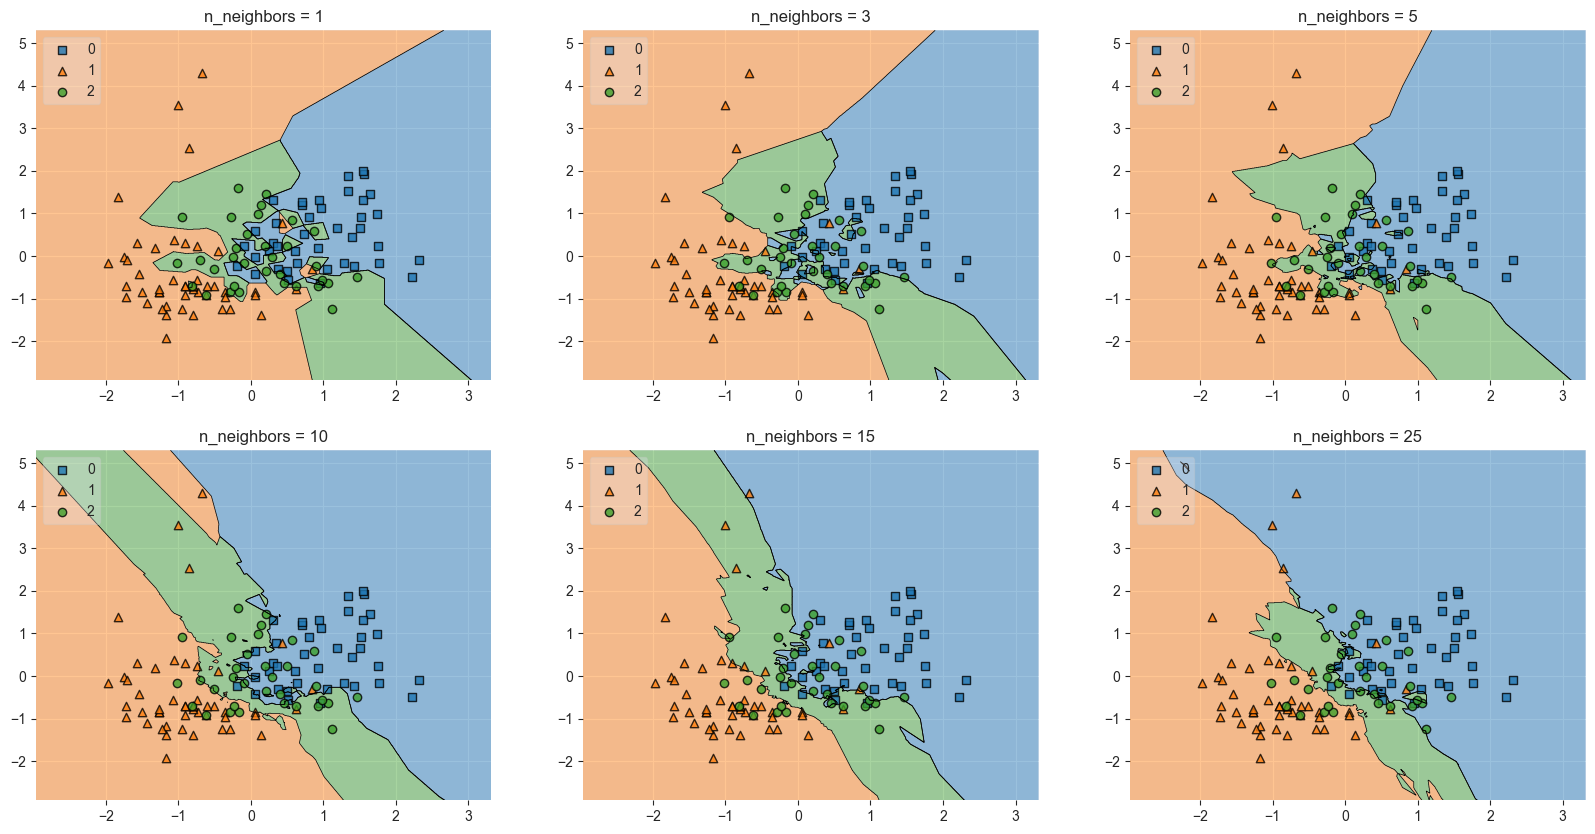

In [58]:
# за основу взял пример 3
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20, 10))

for clf, lab, grd in zip(neighbors_to_predict["classifiers"],
                         neighbors_to_predict["neighbors"],
                         itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled.to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title(f"n_neighbors = {lab}")

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [ ]:
# 1.3
# Наилучшую точность показал классификатор с 5 соседями. (смотрел на тесте)
# Хотя схожие показатели на тесте показали классификаторы с 15 и 25 соседями,
# 5 соседей всё равно будут лучше, так как они будут более оптимальны с точки зрения производительности
# Также стоит отметить, что при k = 1 на трейне результат почти 100%, но это вызвано тем,
# что объекты классификации находят сами себя, но иногда конечно в точке встречается сразу два объёекта разного класса.

# 1.5
# Из решающей поверхностей видно, что также, как в выводе выше, модель с 5 соседями будет наиболее оптимальной
# Также модели c 3, 10 и 15 соседями выглядят не так плохо.
# Модель же с k = 1 очевидно является переобученной, так как даже единичные точки выделяют "острова" для их классификации
# Модели же с k = 25 слишком гладкая, и немного забывает про класс 2, в основном
# разделяя по наиболее частым объектам (0 и 1), что не даёт корректно классифицировать класс 2

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

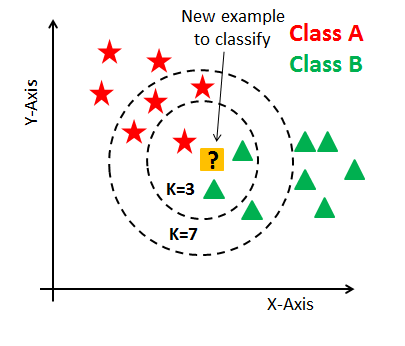

In [214]:
import numpy as np
from collections import Counter


class KNN:
    def __init__(self, k: int):
        self.k = k
        self.X = np.array([])  # храним обучающую выборку
        self.y = np.array([])  # храним обучающую целевую переменную

    def fit(self, X, y):
        # запоминаю все параметры. Буду хранить в списке, где каждое значение имеет вид [X, y]
        self.X = X
        self.y = y

    def predict(self, X):
        predictions = []
        for x_cur in X:
            # заменяю параметры на расстояние от x_cur до этого параметра
            X_cur_distances = []
            for x_neighbor in self.X:
                X_cur_distances.append(KNN.count_distance(np.array(x_cur), np.array(x_neighbor)))
            X_cur_distances = np.array(X_cur_distances)
            
            # нахожу за O(n) k ближайщих соседей с помощью np.argpartition
            k_nearest_indexes = np.argpartition(X_cur_distances, self.k)[:self.k]
            
            # получаю целевые переменные ближайших соседей по индексам
            k_nearest_y = self.y[k_nearest_indexes]
            
            # добавляю k минимальных в Counter вида целевая переменная: их количество в ближайших соседях
            knn_counter = Counter(k_nearest_y)
            
            # и нахожу самый частый. если их несколько - беру первый в списке 
            max_amount = float("-inf")
            predict = None # класс с максимальным количеством
            for key,val in knn_counter.items():
                if val > max_amount:
                    max_amount = val
                    predict = key
            # добавлю классификацию для этого значения в список предиктов
            predictions.append(predict)
        return np.array(predictions)

    @staticmethod
    def count_distance(x, y):
        # как я понял это должна быть локальная функция, считающая расстояние между двумя объектами
        # уберу аргумент self и добавлю декоратор @staticmethod чтобы сделать метод статичным (не использует данных объекта класса).
        # считать буду евклидово расстояние, так как оно самое стандартное

        # евклидово расстояние можно найти по формуле
        distance = np.sum(np.square(y - x))
        return distance

In [212]:
# Не меняйте файл!
def test_knn(KNN):
    knn = KNN(k=1)
    X_train = np.array([[1, 1], [2, 2]])
    y_train = np.array([0, 1])
    X_test = np.array([[1.5, 1.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [0]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[9.5, 9.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5.5, 5.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[15, 15]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5, 5], [2, 2]])
    knn.fit(X_train, y_train)
    assert all(knn.predict(X_test) == [1, 0])

In [213]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data.select_dtypes(exclude='number')

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.